In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
N,M,T_steps,T = 500,500,5000,0.005
h,dt = 1 / max(N, M),T / T_steps

u,ux1,ux2,uy1,uy2 = np.zeros((T_steps, N, M)),np.zeros(M) + 0,np.zeros(M) + 0,np.zeros(N) + 0,np.zeros(N) + 0
u[0, 0],u[0, N-1],u[0, :, 0],u[0, :, M-1] = ux1,ux2,uy1,uy2

def f(x, y):
    A = (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) < 0.02**2
    return 50*np.array(A)


X, Y = np.meshgrid(np.linspace(0, 1, M, endpoint=False), np.linspace(0, 1, N, endpoint=False))


for i in range(1, T_steps):
    u[i,1:N-1,1:M-1] = u[i-1,1:N-1,1:M-1]+dt*(f(X[1:N-1,1:M-1],Y[1:N-1,1:M-1])+(u[i-1,2:N,1:M-1]+u[i-1,0:N-2,1:M-1] 
                                    + u[i-1,1:N-1,2:M]+u[i-1,1:N-1,0:M-2]-4*u[i-1,1:N-1,1:M-1])/h**2)

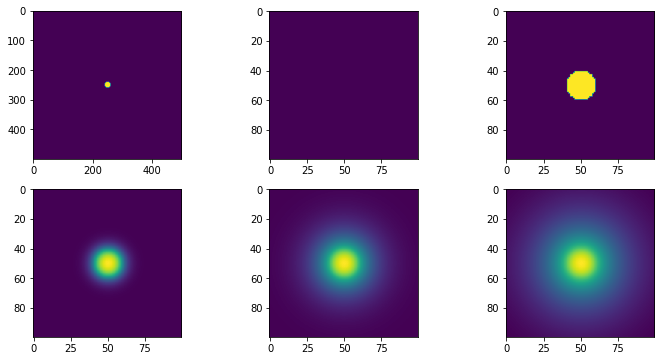

In [3]:
fig, axes = plt.subplots(2, 3)

axes[0,0].imshow((f(X, Y)))
axes[0,1].imshow(u[0, 200:300, 200:300])
axes[0,2].imshow(u[1, 200:300, 200:300])
axes[1,0].imshow(u[100, 200:300, 200:300])
axes[1,1].imshow(u[1000, 200:300, 200:300])
axes[1,2].imshow(u[3000, 200:300, 200:300])

fig.set_figwidth(12)   
fig.set_figheight(6)

plt.show()